In [1]:
import os
# change to the root directory of the project
while os.getcwd().split('/')[-1] != 'spectral-properties-of-NN':
    os.chdir('..')
print(os.getcwd())

/home/nadezhda/Desktop/SEMESTER PROJECT/spectral-properties-of-NN


In [2]:
# arguments
import yaml
from omegaconf import OmegaConf
import torch
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
  ❓ <strong> Question: </strong> 

   What is the relationship between the number of Lanczos iterations and the number of correctly estimated extreme eigenvalues?

</div>

## Experiment 01: Neural Network - MNIST - Layers: [784, 16, 10]

### 1. Untrained Model

In [3]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "untrained"
LANCZOS = "slow"
HBS = 60000
ITERS = [10, 50, 100, 200, 500, 1000]

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")
sorted_gt_eigenvalues = np.sort(gt_eigenvalues.numpy())
# load the computed eigenvalues
lanczos_eigenvalues = {}
for ITER in ITERS:
    lanczos_eigenvalues[ITER] = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

Results directory: experiments/01_NN_MNIST/results/untrained/slow


In [4]:
# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"
print(f"Plot title: {plot_title}")

Plot title: Untrained - NeuralNetwork - MNIST - Layers: [784, 16, 10]


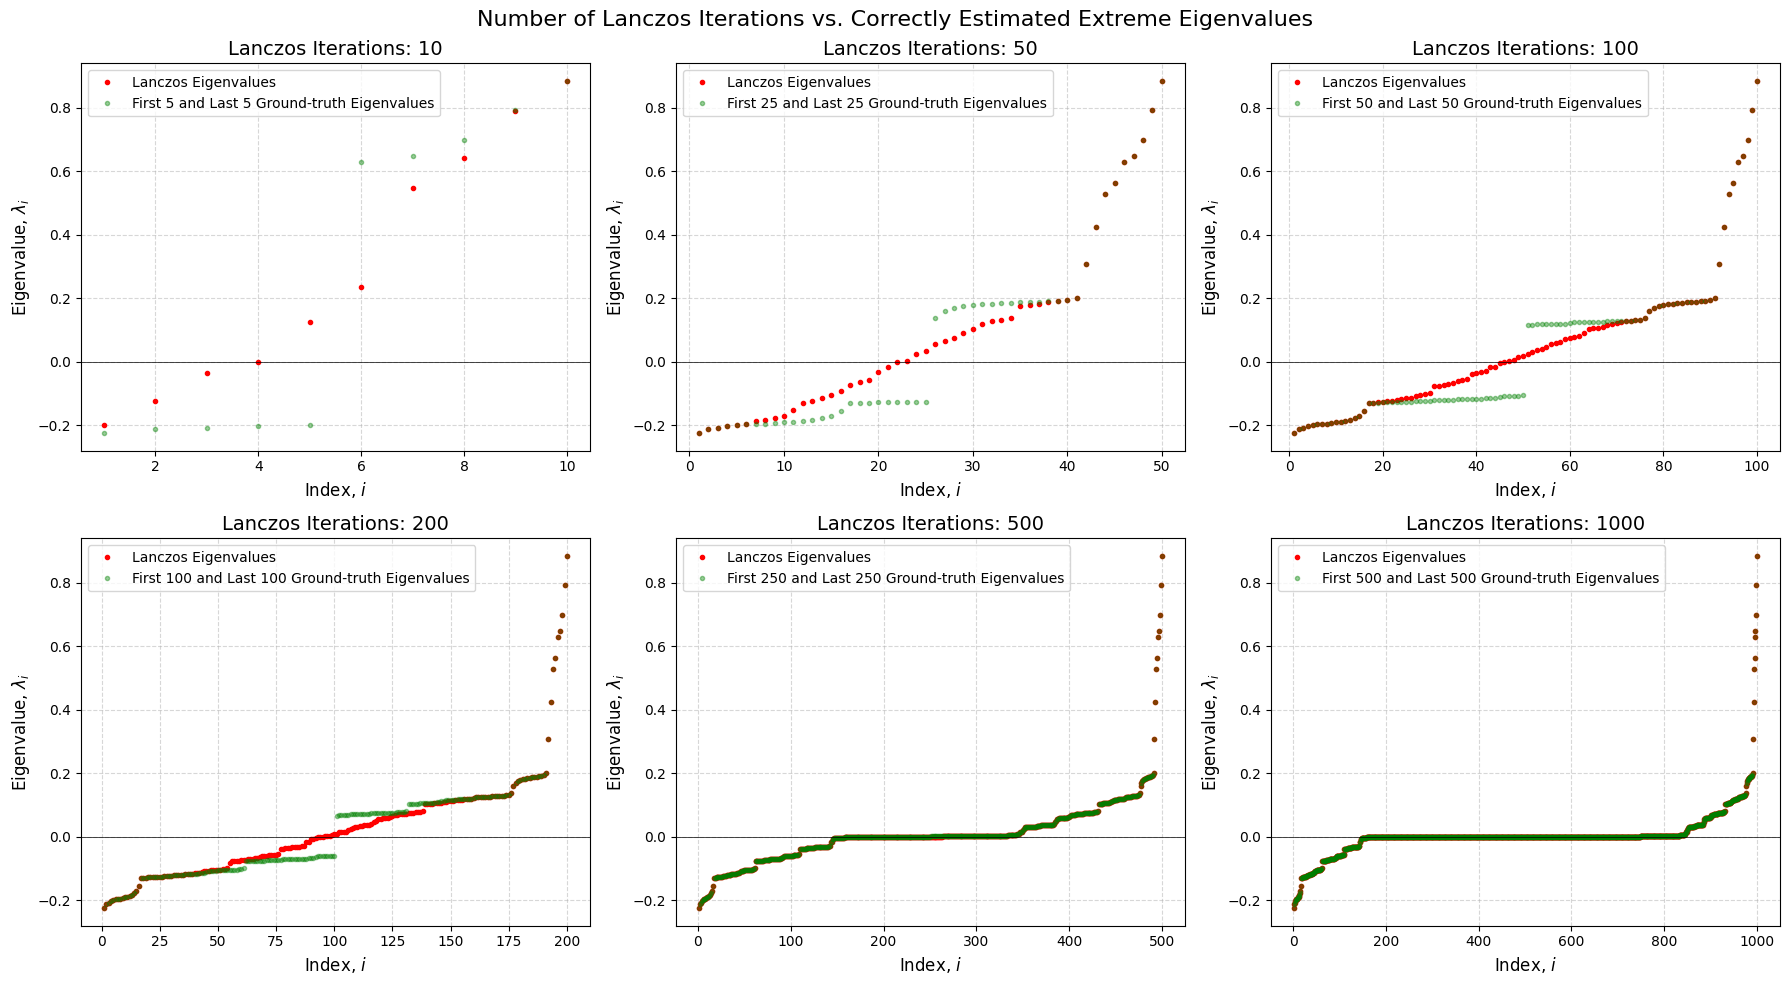

In [ ]:
plt.figure(figsize=(18, 10))
for i, ITER in enumerate(ITERS):
    plt.subplot(2, 3, i + 1)
    # lanczos eigenvalues
    sorted_lanczos_eigenvalues = np.sort(lanczos_eigenvalues[ITER])
    x_indices_lanczos = np.arange(1, len(sorted_lanczos_eigenvalues) + 1)
    # groundtruth eigenvalues
    x = ITER//2
    first_x_gt_eigenvalues = sorted_gt_eigenvalues[:x]
    last_x_gt_eigenvalues = sorted_gt_eigenvalues[-x:]
    combined_gt_eigenvalues = np.concatenate((first_x_gt_eigenvalues, last_x_gt_eigenvalues))
    # plot
    plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3, label="Lanczos Eigenvalues")
    plt.plot(x_indices_lanczos, combined_gt_eigenvalues, marker="o", linestyle="", color="green", markersize=3, alpha=0.4, label=f"First {x} and Last {x} Ground-truth Eigenvalues")
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
    # plt.title(f"Algorithm: {LANCZOS.capitalize()} Lanczos\nHessian Batch Size: {HBS}\nLanczos Iterations: {ITER}")
    plt.title(f"Lanczos Iterations: {ITER}", fontsize=14)
    plt.xlabel(r"Index, $i$", fontsize=12)
    plt.ylabel(r"Eigenvalue, $\lambda_{i}$", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True, alpha=0.5, linestyle="--")

# plt.suptitle(plot_title, y=1.02, fontsize=14)
plt.suptitle("Number of Lanczos Iterations vs. Correctly Estimated Extreme Eigenvalues", fontsize=16)
plt.tight_layout()
# plt.savefig("q2.png", dpi=500)
plt.show()

### 2. Trained model

In [6]:
EXPERIMENT = "01_NN_MNIST"
MODEL = "trained"
LANCZOS = "slow"
HBS = 60000
ITERS = [10, 50, 100, 200, 500, 1000]

# get the results directory path
results_dir = f"experiments/{EXPERIMENT}/results/{MODEL}/{LANCZOS}"
print(f"Results directory: {results_dir}")

# load "groundtruth" eigenvalues
gt_eigenvalues = torch.load(f"experiments/{EXPERIMENT}/groundtruth/model_{MODEL}/eigenvalues.pt")
sorted_gt_eigenvalues = np.sort(gt_eigenvalues.numpy())
# load the computed eigenvalues
lanczos_eigenvalues = {}
for ITER in ITERS:
    lanczos_eigenvalues[ITER] = torch.load(os.path.join(results_dir, f"HBS_{HBS}/01_run/eigenvalues_iter_{ITER}.pt"))

Results directory: experiments/01_NN_MNIST/results/trained/slow


In [7]:
# get model information from config file
args = OmegaConf.create(yaml.load(open(f"experiments/{EXPERIMENT}/config.yaml"), Loader=yaml.SafeLoader))
plot_title = f"{MODEL.capitalize()} - {args.model_name} - {args.dataset} - Layers: {args.layer_sizes}"
print(f"Plot title: {plot_title}")

Plot title: Trained - NeuralNetwork - MNIST - Layers: [784, 16, 10]


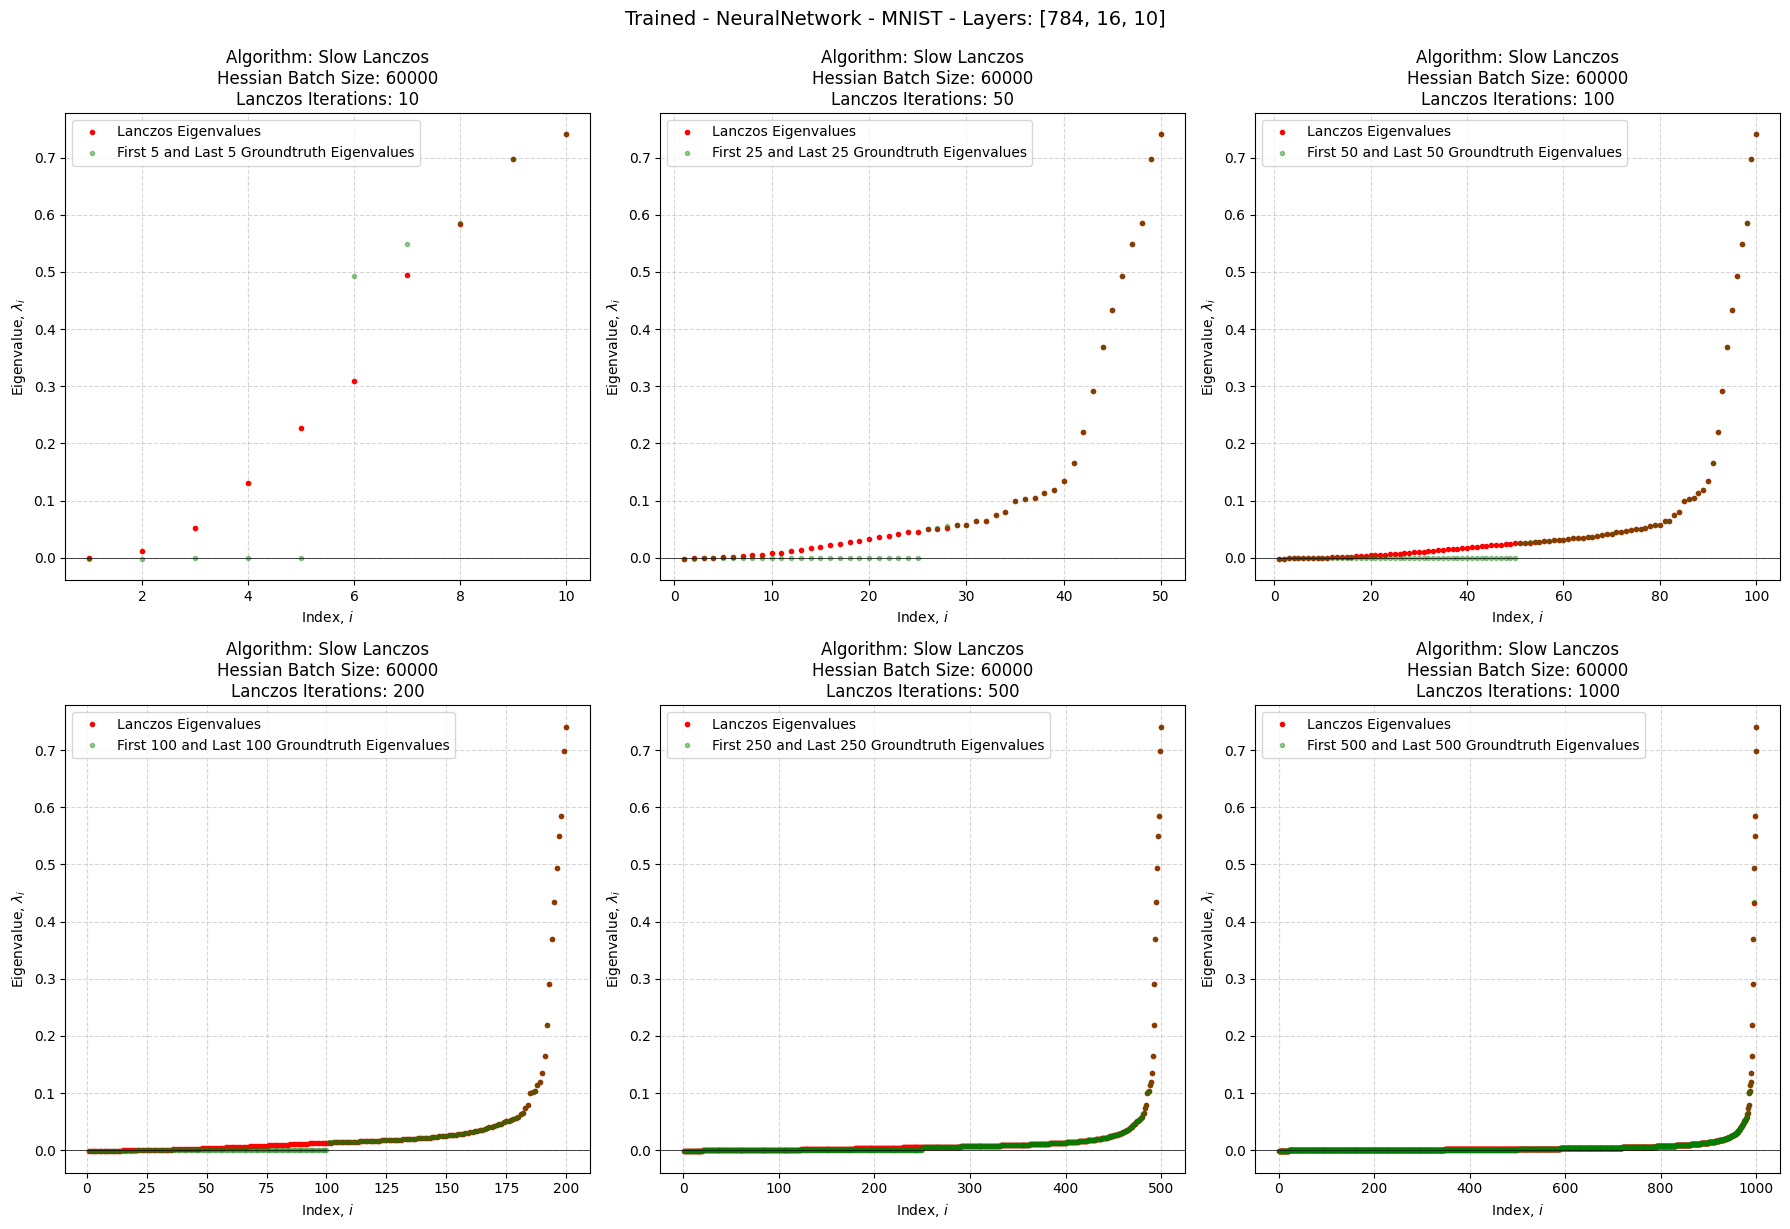

In [8]:
plt.figure(figsize=(18, 12))
for i, ITER in enumerate(ITERS):
    plt.subplot(2, 3, i + 1)
    # lanczos eigenvalues
    sorted_lanczos_eigenvalues = np.sort(lanczos_eigenvalues[ITER])
    x_indices_lanczos = np.arange(1, len(sorted_lanczos_eigenvalues) + 1)
    # groundtruth eigenvalues
    x = ITER//2
    first_x_gt_eigenvalues = sorted_gt_eigenvalues[:x]
    last_x_gt_eigenvalues = sorted_gt_eigenvalues[-x:]
    combined_gt_eigenvalues = np.concatenate((first_x_gt_eigenvalues, last_x_gt_eigenvalues))
    # plot
    plt.plot(x_indices_lanczos, sorted_lanczos_eigenvalues, marker="o", linestyle="", color="red", markersize=3, label="Lanczos Eigenvalues")
    plt.plot(x_indices_lanczos, combined_gt_eigenvalues, marker="o", linestyle="", color="green", markersize=3, alpha=0.4, label=f"First {x} and Last {x} Groundtruth Eigenvalues")
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # add horizontal line at y=0
    plt.title(f"Algorithm: {LANCZOS.capitalize()} Lanczos\nHessian Batch Size: {HBS}\nLanczos Iterations: {ITER}")
    plt.xlabel(r"Index, $i$", fontsize=10)
    plt.ylabel(r"Eigenvalue, $\lambda_{i}$", fontsize=10)
    plt.legend(loc="upper left")
    plt.grid(True, alpha=0.5, linestyle="--")

plt.tight_layout()
plt.suptitle(plot_title, y=1.02, fontsize=14)
plt.show()